# Problem Statement: 
Gender Prediction based in First Name

Aim is to write code to train and serve a machine learning model to assign a gender (male, female) to first names.

# Data Collection

As provided for the assessment.

# Data Import and Processing

In [ ]:
# Importing neccessary modules for data processing.

import numpy as np 
import pandas as pd 
import os

# Following code is not required when it is run outside Kaggle environment
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [34]:
# Importing neccessary libraries for model building and training

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [35]:
# Defining the input file path. 
# Note: - This filepath has to be updated for new data location

filepath = '../input/genderpred/name_gender.csv'

df = pd.read_csv(filepath,usecols=[0,1],header=None, names=['name', 'gender'])

df.head()

,name,gender
0,Aaban,M
1,Aabha,F
2,Aabid,M
3,Aabriella,F
4,Aada,F


In [36]:
df['name'] = df['name'].apply(lambda x: str(x).lower())

names = df['name'].apply(lambda x: x.lower())
gender = df['gender']

df.head(5)

,name,gender
0,aaban,M
1,aabha,F
2,aabid,M
3,aabriella,F
4,aada,F


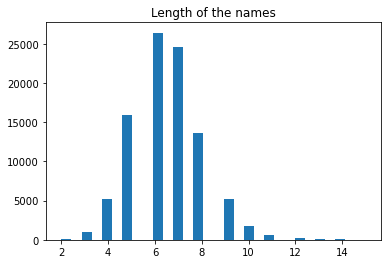

In [37]:
plt.hist([len(a) for a in names], bins=30)
plt.title('Length of the names')
plt.show()

In [38]:
maxlen = 20
labels = 2

In [39]:
# Checkgin class balance
print('Male : ' + str(sum(gender=='M')))
print('Female : ' + str(sum(gender=='F')))

Male : 34721
Female : 60304


In [40]:
vocab = set(' '.join([str(i) for i in names]))
vocab.add('END')
len_vocab = len(vocab)
len_vocab

In [41]:
char_index = dict((c, i) for i, c in enumerate(vocab))
print(char_index)

{'z': 0, 'o': 1, 'i': 2, 'r': 3, 't': 4, 'k': 5, 'm': 6, 'p': 7, 'x': 8, 'h': 9, 'b': 10, 'v': 11, 'u': 12, 'l': 13, 'y': 14, 's': 15, 'j': 16, 'w': 17, 'd': 18, 'g': 19, 'c': 20, 'END': 21, ' ': 22, 'q': 23, 'f': 24, 'a': 25, 'e': 26, 'n': 27}


In [42]:
X = []
y = []

# Builds an empty line with a 1 at the index of character
def set_flag(i):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return list(tmp)

# Truncate names and create the matrix
def prepare_X(X):
    new_list = []
    trunc_train_name = [str(i)[0:maxlen] for i in X]
    for i in trunc_train_name:
        tmp = [set_flag(char_index[j]) for j in str(i)]
        for k in range(0,maxlen - len(str(i))):
            tmp.append(set_flag(char_index['END']))
        new_list.append(tmp)
    return new_list

X = prepare_X(names.values)

# Label Encoding of y
def prepare_y(y):
    new_list = []
    for i in y:
        if i == 'M':
            new_list.append([1,0])
        else:
            new_list.append([0,1])
    return new_list

y = prepare_y(gender)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model building and training - LSTM

In [44]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), backward_layer=LSTM(128, return_sequences=True, go_backwards=True), input_shape=(maxlen,len_vocab)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax', activity_regularizer=l2(0.001)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 20, 256)           160768    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                73984     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 234,882
Trainable params: 234,882
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
callback = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='max')

# Model Evaluation

In [ ]:
# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'])

plt.show()

# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Test'])

plt.show()